In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 9 ##

## Visualization Review: Sleep Study ##

In [3]:
sleep = Table.read_table('SleepStudy.csv')
sleep.show(5)

Gender,ClassYear,LarkOwl,NumEarlyClass,EarlyClass,GPA,ClassesMissed,CognitionZscore,PoorSleepQuality,DepressionScore,AnxietyScore,StressScore,DepressionStatus,AnxietyStatus,Stress,DASScore,Happiness,AlcoholUse,Drinks,WeekdayBed,WeekdayRise,WeekdaySleep,WeekendBed,WeekendRise,WeekendSleep,AverageSleep,AllNighter
0,4,Neither,0,0,3.6,0,-0.26,4,4,3,8,normal,normal,normal,15,28,Moderate,10,25.75,8.7,7.7,25.75,9.5,5.88,7.18,0
0,4,Neither,2,1,3.24,0,1.39,6,1,0,3,normal,normal,normal,4,25,Moderate,6,25.7,8.2,6.8,26,10,7.25,6.93,0
0,4,Owl,0,0,2.97,12,0.38,18,18,18,9,moderate,severe,normal,45,17,Light,3,27.44,6.55,3,28,12.59,10.09,5.02,0
0,1,Lark,5,1,3.76,0,1.39,9,1,4,6,normal,normal,normal,11,32,Light,2,23.5,7.17,6.77,27,8,7.25,6.9,0
0,4,Owl,0,0,3.2,4,1.22,9,7,25,14,normal,severe,normal,46,15,Moderate,4,25.9,8.67,6.09,23.75,9.5,7,6.35,0


### Scatter Plots

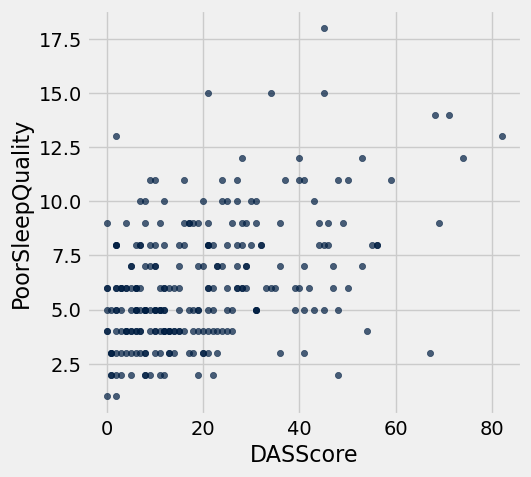

In [4]:
sleep.scatter('DASScore', 'PoorSleepQuality')

### Bar Charts

In [5]:
AnxietyStatus = sleep.group('AnxietyStatus')
AnxietyStatus

AnxietyStatus,count
moderate,56
normal,181
severe,16


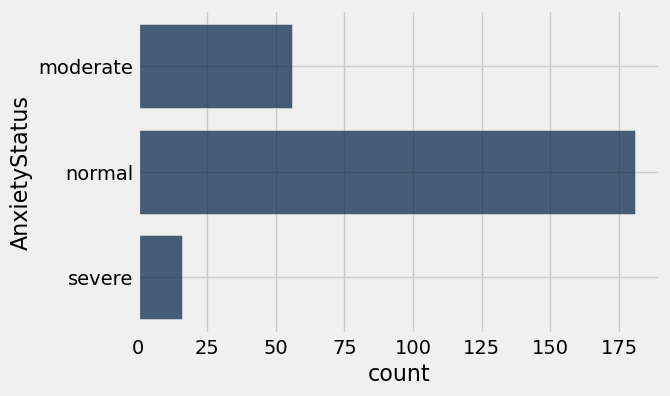

In [6]:
AnxietyStatus.barh('AnxietyStatus')

### Histograms

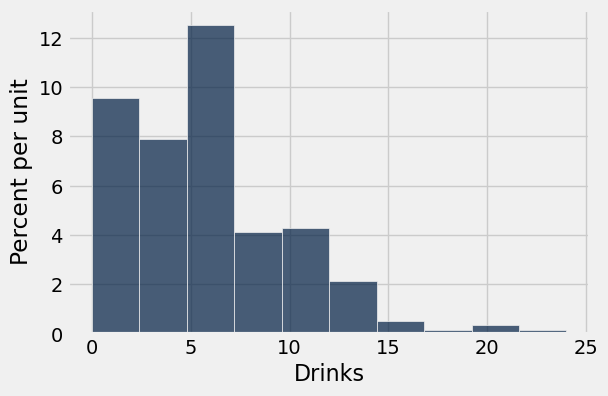

In [7]:
sleep.hist('Drinks')

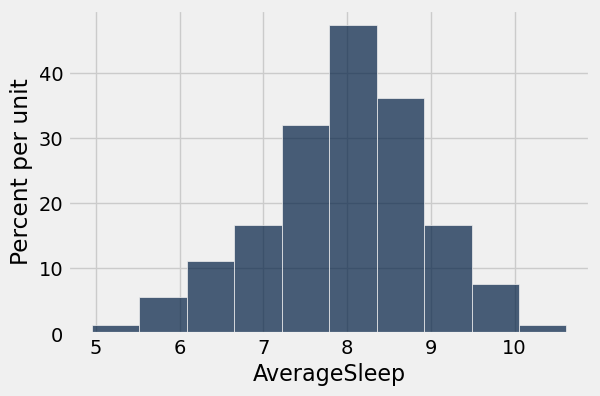

In [8]:
sleep.hist('AverageSleep')

In [9]:
min(sleep.column('AverageSleep')), max(sleep.column('AverageSleep'))

(4.9500000000000002, 10.619999999999999)

In [11]:
sleep_bins = np.arange(4,11,0.5)

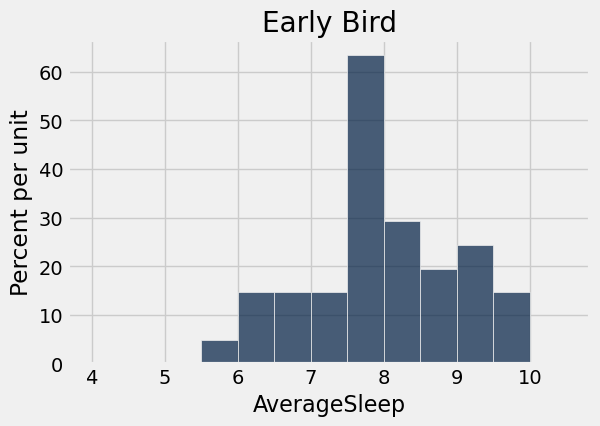

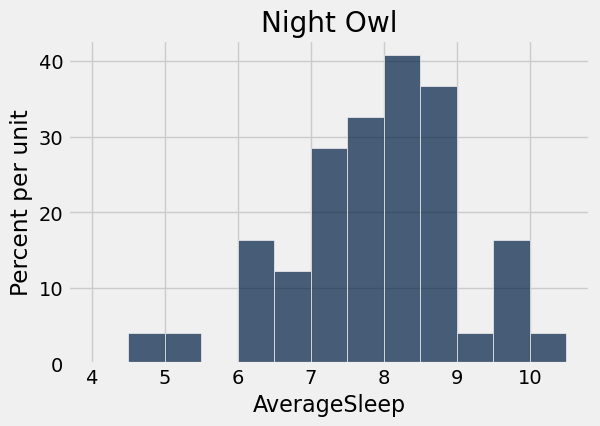

In [14]:
LarkSleep = sleep.where('LarkOwl', are.containing('Lark'))
LarkSleep.hist('AverageSleep', bins=sleep_bins)
plots.title('Early Bird');

OwlSleep = sleep.where('LarkOwl', are.containing('Owl'))
OwlSleep.hist('AverageSleep', bins=sleep_bins)
plots.title('Night Owl');

## Functions ##

In [15]:
max(5, 6, 7)

7

In [17]:
def triple(x):
    return 3 * x

In [18]:
triple(3)

9

In [19]:
num = 4

In [20]:
triple(num)

12

In [21]:
triple(num * 5)

60

### Note About Scopes

In [22]:
def multiple_of_y(x):
    y = 5
    return y * x

In [23]:
multiple_of_y(10)

50

In [24]:
def multiple_of_y(x):
    y = 10
    return y * x

In [25]:
multiple_of_y(10)

100

In [ ]:
y

NameError: name 'y' is not defined

### Type Agnostic

In [ ]:
triple('ha')

'hahaha'

In [ ]:
triple(np.arange(10))

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27])

### Questions

In [ ]:
def f(s):
    return np.round(s / sum(s) * 100, 2)

In [ ]:
f(5)

TypeError: 'int' object is not iterable

In [ ]:
f(5.0)

TypeError: 'float' object is not iterable

In [ ]:
f('boo')

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [ ]:
my_new_array = np.arange(5)
f(my_new_array)

array([  0.,  10.,  20.,  30.,  40.])

In [ ]:
my_newer_array = np.arange(0, 100, 3)
my_newer_array

f(my_newer_array)

array([ 0.  ,  0.18,  0.36,  0.53,  0.71,  0.89,  1.07,  1.25,  1.43,
        1.6 ,  1.78,  1.96,  2.14,  2.32,  2.5 ,  2.67,  2.85,  3.03,
        3.21,  3.39,  3.57,  3.74,  3.92,  4.1 ,  4.28,  4.46,  4.63,
        4.81,  4.99,  5.17,  5.35,  5.53,  5.7 ,  5.88])

In [ ]:
def percent_of_whole(s):
    return np.round(s / sum(s) * 100, 2)

In [ ]:
percent_of_whole(my_new_array)

array([  0.,  10.,  20.,  30.,  40.])

## Apply ##

In [37]:
My_States = Table().with_columns(
    'State', make_array('CT', 'CA', 'NY'),
    'Year Last Lived', make_array(2010, 2016, 2018)
)
My_States

State,Year Last Lived
CT,2010
CA,2016
NY,2018


In [38]:
def how_long_since_left(x):
    return 2021 - x

In [39]:
how_long_since_left(2010)

11

In [40]:
how_long_since_left(2016)

5

In [41]:
My_States.apply(how_long_since_left, 'Year Last Lived')

array([11,  5,  3])

In [42]:
sleep.show(5)

Gender,ClassYear,LarkOwl,NumEarlyClass,EarlyClass,GPA,ClassesMissed,CognitionZscore,PoorSleepQuality,DepressionScore,AnxietyScore,StressScore,DepressionStatus,AnxietyStatus,Stress,DASScore,Happiness,AlcoholUse,Drinks,WeekdayBed,WeekdayRise,WeekdaySleep,WeekendBed,WeekendRise,WeekendSleep,AverageSleep,AllNighter
0,4,Neither,0,0,3.6,0,-0.26,4,4,3,8,normal,normal,normal,15,28,Moderate,10,25.75,8.7,7.7,25.75,9.5,5.88,7.18,0
0,4,Neither,2,1,3.24,0,1.39,6,1,0,3,normal,normal,normal,4,25,Moderate,6,25.7,8.2,6.8,26,10,7.25,6.93,0
0,4,Owl,0,0,2.97,12,0.38,18,18,18,9,moderate,severe,normal,45,17,Light,3,27.44,6.55,3,28,12.59,10.09,5.02,0
0,1,Lark,5,1,3.76,0,1.39,9,1,4,6,normal,normal,normal,11,32,Light,2,23.5,7.17,6.77,27,8,7.25,6.9,0
0,4,Owl,0,0,3.2,4,1.22,9,7,25,14,normal,severe,normal,46,15,Moderate,4,25.9,8.67,6.09,23.75,9.5,7,6.35,0


In [43]:
def Calculate_DAS(Stress, Anxiety, Depression):
    return sum(make_array(Stress, Anxiety, Depression))

In [44]:
Calculate_DAS(4, 3, 8)

15

In [45]:
Calculate_DAS(
    sleep.column('StressScore').item(0),
    sleep.column('AnxietyScore').item(0),
    sleep.column('DepressionScore').item(0)
)

15

In [46]:
sleep.apply(Calculate_DAS, 'StressScore', 'AnxietyScore', 'DepressionScore')

array([15,  4, 45, 11, 46, 50,  2,  7, 48, 48, 27, 21, 41,  8,  5, 15, 44,
       55,  6, 21, 34, 19, 12, 11, 18, 44, 41, 56, 18, 29, 53, 21,  7, 27,
       41, 16,  7, 12, 26, 40,  4, 15,  0, 20, 22, 33, 31, 12,  7, 20,  8,
       69, 15, 29,  4, 20, 59, 45,  5, 10,  6,  0, 16, 74, 26, 10, 10,  7,
       23,  6, 11, 12, 28, 56, 21, 31, 39,  9, 11, 14, 29,  9, 36,  1, 41,
        2, 47, 10, 21, 46,  3, 40,  4, 18,  0,  8,  7,  8,  8, 35,  0, 25,
       25, 47, 53, 20,  3, 71, 25, 12, 22,  5,  1,  0, 10,  8,  2, 49,  6,
       27,  2, 13, 31, 19,  8,  7, 17,  6, 45, 39,  6, 40, 10, 21, 13, 13,
       19, 54,  2, 28, 31, 22, 32, 82,  8, 14, 19, 21,  6, 21,  1, 23,  6,
       24,  8,  4, 30, 42,  3,  2, 67,  8, 19, 30, 10,  2, 28,  9, 16, 15,
       23,  6, 28, 43,  9, 10, 50, 18,  3, 36,  0, 21,  6,  5,  5, 11, 13,
       26, 23, 12, 25, 43, 28, 31, 68,  3, 16, 17, 17, 48, 12,  1,  0, 12,
        3, 22,  1, 25, 32, 37,  8, 10, 20,  1,  2, 36, 15, 21, 10, 17,  9,
       11,  4,  2,  2,  5

In [47]:
sleep = sleep.with_column(
    'DAS Calculation', sleep.apply(Calculate_DAS, 'StressScore', 'AnxietyScore', 'DepressionScore')
)

sleep

Gender,ClassYear,LarkOwl,NumEarlyClass,EarlyClass,GPA,ClassesMissed,CognitionZscore,PoorSleepQuality,DepressionScore,AnxietyScore,StressScore,DepressionStatus,AnxietyStatus,Stress,DASScore,Happiness,AlcoholUse,Drinks,WeekdayBed,WeekdayRise,WeekdaySleep,WeekendBed,WeekendRise,WeekendSleep,AverageSleep,AllNighter,DAS Calculation
0,4,Neither,0,0,3.6,0,-0.26,4,4,3,8,normal,normal,normal,15,28,Moderate,10,25.75,8.7,7.7,25.75,9.5,5.88,7.18,0,15
0,4,Neither,2,1,3.24,0,1.39,6,1,0,3,normal,normal,normal,4,25,Moderate,6,25.7,8.2,6.8,26,10,7.25,6.93,0,4
0,4,Owl,0,0,2.97,12,0.38,18,18,18,9,moderate,severe,normal,45,17,Light,3,27.44,6.55,3,28,12.59,10.09,5.02,0,45
0,1,Lark,5,1,3.76,0,1.39,9,1,4,6,normal,normal,normal,11,32,Light,2,23.5,7.17,6.77,27,8,7.25,6.9,0,11
0,4,Owl,0,0,3.2,4,1.22,9,7,25,14,normal,severe,normal,46,15,Moderate,4,25.9,8.67,6.09,23.75,9.5,7,6.35,0,46
1,4,Neither,0,0,3.5,0,-0.04,6,14,8,28,moderate,moderate,high,50,22,Abstain,0,23.8,8.95,9.05,26,10.75,9,9.04,0,50
1,2,Lark,2,1,3.35,2,0.41,2,1,0,1,normal,normal,normal,2,25,Moderate,6,25.35,8.48,7.73,25.63,10.13,7,7.52,1,2
0,2,Lark,0,0,3,0,-0.59,10,2,2,3,normal,normal,normal,7,29,Light,3,23.9,9.07,9.02,25.13,9.75,9,9.01,0,7
0,1,Neither,2,1,4,0,1.03,5,12,16,20,moderate,severe,high,48,29,Light,3,24.4,8.75,8.25,24,9,9.25,8.54,0,48
0,4,Neither,2,1,2.9,0,0.72,2,6,11,31,normal,moderate,high,48,30,Moderate,6,26.2,8,6.6,25.38,10.25,6.88,6.68,0,48


In [48]:
sleep.select('DASScore', 'DAS Calculation')

DASScore,DAS Calculation
15,15
4,4
45,45
11,11
46,46
50,50
2,2
7,7
48,48
48,48
